# 이변량_범주 vs 범주

# 1.환경준비

## (1) 라이브러리

In [1]:
import pandas as pd
import numpy as np
# import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

## (2) 데이터 불러오기
* 다음의 예제 데이터를 사용합니다.
> 타이타닉 생존자  


In [ ]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


# 2.범주 --> 범주

## (1) 교차표(pd.crosstab)

범주 vs 범주 를 비교하고 분석하기 위해서는 먼저 **교차표**를 만들어야 합니다.

* pd.crosstab(행, 열)

In [ ]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(titanic['Survived'], titanic['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


* pd.crosstab(행, 열, normalize =   )

<img src='https://github.com/DA4BAM/image/blob/main/crosstab.png?raw=true' width=700/>


In [ ]:
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'columns')

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


In [ ]:
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'index')

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


In [ ]:
pd.crosstab(titanic['Survived'], titanic['Embarked'], normalize = 'all')

Embarked,C,Q,S
Survived,,,
0,0.084175,0.05275,0.479237
1,0.104377,0.03367,0.245791


## (2) 시각화
* mosaic
* (참조) 100% Stacked Bar


1) Pclass --> Survived

* mosaic plot
    * mosaic(dataframe, [ feature, target])

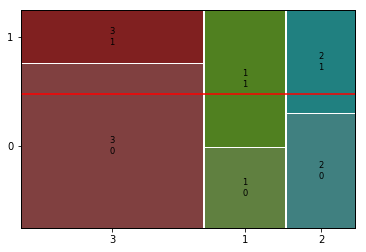

In [ ]:
# Pclass별 생존여부를 mosaic plot으로 그려 봅시다.
mosaic(titanic, [ 'Pclass','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

① X축 길이는 각 객실등급별 승객비율을 나타냅니다.  
② 그 중 3등급 객실에 대해서 보면, y축의 길이는, 3등급 객실 승객 중에서 사망, 생존 비율을 의미합니다.

* 100% Stacked Bar
    * 먼저 crosstab으로 집계 : pd.crosstab(**feature**, **target**, normalize = **'index'**)
    * .plot.bar(stacked = true)
    * 전체 평균선 : plt.axhline()

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


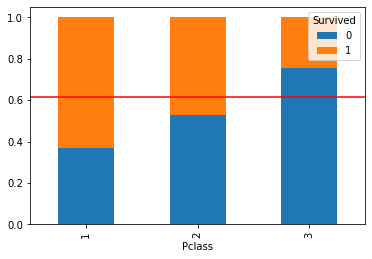

In [ ]:
# 비율만 보이고 이 순서대로 코드를 작성해야 함 ********************
temp = pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

비율만 비교하므로 양에 대한 비교는 할 수 없다!

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

아래 관계에 대해서 교차표와 시각화(mosaic)를 수행하고, feature와 target 간에 관계가 있는지 분석해 봅시다.


In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


* [문1] Sex --> Survived

In [ ]:
var = 'Sex'

In [ ]:
pd.crosstab(titanic['Survived'], titanic[var], normalize = 'columns')

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


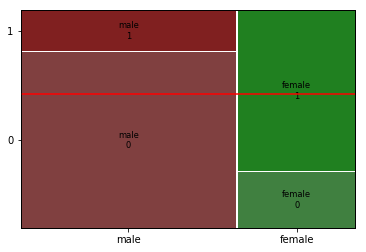

In [ ]:
mosaic(titanic, [ var,'Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

* [문2] Embarked --> Survived

In [ ]:
var = 'Embarked'

In [ ]:
pd.crosstab(titanic['Survived'], titanic[var], normalize = 'columns')

Embarked,C,Q,S
Survived,,,
0,0.446429,0.61039,0.660991
1,0.553571,0.38961,0.339009


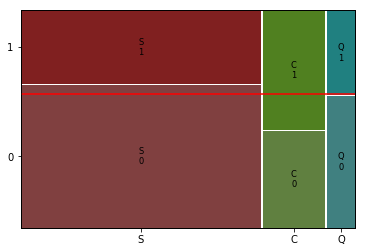

In [ ]:
mosaic(titanic, [ var,'Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

* [문3] Title --> Survived

In [ ]:
var = 'Title'

In [ ]:
pd.crosstab(titanic['Survived'], titanic[var], normalize = 'columns')

Title,Master,Miss,Mr,Mrs,Others
Survived,,,,,
0,0.439024,0.297297,0.839388,0.203125,0.785714
1,0.560976,0.702703,0.160612,0.796875,0.214286


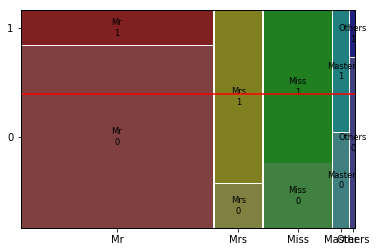

In [ ]:
mosaic(titanic, [ var,'Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

## (3) 수치화 : 카이제곱검정

* 카이제곱검정 : 범주형 변수들 사이에 어떤 관계가 있는지, 수치화 하는 방법

![image.png](https://github.com/DA4BAM/image/blob/main/%EC%B9%B4%EC%9D%B4%EC%A0%9C%EA%B3%B1%20%ED%86%B5%EA%B3%84%EB%9F%89.png?raw=true)

* 카이 제곱 통계량은
    * 클수록 기대빈도로부터 실제 값에 차이가 크다는 의미.
    * 계산식으로 볼 때, 범주의 수가 늘어날 수록 값은 커지게 되어 있음.
    * 보통, 자유도의 2~3배 보다 크면, 차이가 있다고 본다.

* 범주형 변수의 자유도 : 범주의 수 - 1

* 카이제곱검정에서는
    * x 변수의 자유도 × y 변수의 자유도
    * 예 : Pclass --> Survived
        * Pclass : 범주가 3개, Survived : 2개
        * (3-1) * (2-1) = 2
        * 그러므로, 2의 2 ~ 3배인 4 ~ 6 보다 카이제곱 통계량이 크면, 차이가 있다고 볼수 있음.


* 타이타닉 데이터에서 객실등급과 생존여부 간의 카이제곱 검정을 수행해 봅시다.

In [ ]:
pd.crosstab(titanic['Survived'], titanic['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [ ]:
# 1) 먼저 교차표 집계- normalize 하면 안 됨
table = pd.crosstab(titanic['Survived'], titanic['Pclass'])
print(table)
print('-' * 50)

# 2) 카이제곱검정
spst.chi2_contingency(table)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
--------------------------------------------------


(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909, 113.37373737, 302.53535354],
        [ 82.90909091,  70.62626263, 188.46464646]]))

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

다음의 관계에 대해 수치화 해 봅시다.

* [문1] Sex --> Survived

In [ ]:
var = 'Sex'
# 1) 먼저 교차표 집계
table = pd.crosstab(titanic['Survived'], titanic[var])
print(table)
print('-' * 50)

# 2) 카이제곱검정
spst.chi2_contingency(table)

Sex       female  male
Survived              
0             81   468
1            233   109
--------------------------------------------------


(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 355.52525253],
        [120.52525253, 221.47474747]]))

* [문2] Embarked --> Survived

In [ ]:
var = 'Embarked'
# 1) 먼저 교차표 집계
table = pd.crosstab(titanic['Survived'], titanic[var])
print(table)
print('-' * 50)

# 2) 카이제곱검정
spst.chi2_contingency(table)

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219
--------------------------------------------------


(25.964452881874784,
 2.3008626481449577e-06,
 2,
 array([[103.51515152,  47.44444444, 398.04040404],
        [ 64.48484848,  29.55555556, 247.95959596]]))

* [문3] Title --> Survived

In [ ]:
var = 'Title'
# 1) 먼저 교차표 집계
table = pd.crosstab(titanic['Survived'], titanic[var])
print(table)
print('-' * 50)

# 2) 카이제곱검정
spst.chi2_contingency(table)

Title     Master  Miss   Mr  Mrs  Others
Survived                                
0             18    55  439   26      11
1             23   130   84  102       3
--------------------------------------------------


(289.1953165452417,
 2.318405007221846e-61,
 4,
 array([[ 25.26262626, 113.98989899, 322.25252525,  78.86868687,
           8.62626263],
        [ 15.73737374,  71.01010101, 200.74747475,  49.13131313,
           5.37373737]]))

# 3.복습문제

* 항공기 탑승객의 만족도와 관련 있는 요인을 분석해 봅시다.
* 약 5천명의 탑승객에 대해서 탑승 경험을 바탕으로 데이터셋이 구성되어 있습니다.
    * Target
        * 탑승 만족도(satisfaction) : 만족 = 1, 불만 = 0
    * Feature
        * 성별, 나이, 여행타입, 객실등급, 비행거리, 객실등급, 비행거리, 식음료 만족도, 출발지연시간


In [13]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Air_Satisfaction.csv'
cols = ['Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Food and drink',
        'Departure Delay in Minutes', 'satisfaction']
data = pd.read_csv(path, usecols = cols)
data['satisfaction'] = np.where(data['satisfaction'] =='satisfied', 1 ,0)
data.head()

,Gender,Age,Type of Travel,Class,Flight Distance,Food and drink,Departure Delay in Minutes,satisfaction
0,Male,13,Personal Travel,Eco Plus,460,5,25,0
1,Male,25,Business travel,Business,235,1,1,0
2,Female,26,Business travel,Business,1142,5,0,1
3,Female,25,Business travel,Business,562,2,11,0
4,Male,61,Business travel,Business,214,4,0,1


다음의 변수 관계에 대해 그래프와 가설검정으로 분석하시오.

In [15]:
target = 'satisfaction'

## (1) Gender --> Satisfaction

In [16]:
feature = 'Gender'

* 시각화

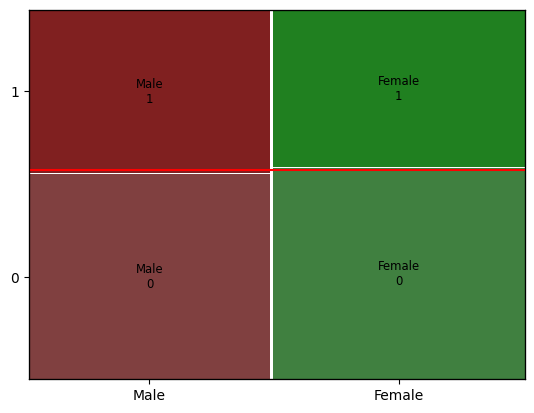

In [19]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [20]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
# print('기대빈도\n',result[3])

교차표
 Gender        Female  Male
satisfaction              
0               1463  1362
1               1088  1087
----------------------------------------------------------------------------------------------------
카이제곱통계량 1.461470294787199
p-value 0.2266963263128574
자유도 1


* 파악된 내용을 기술해 봅시다.

## (2) Type of Travel --> Satisfaction

In [21]:
feature = 'Type of Travel'

* 시각화

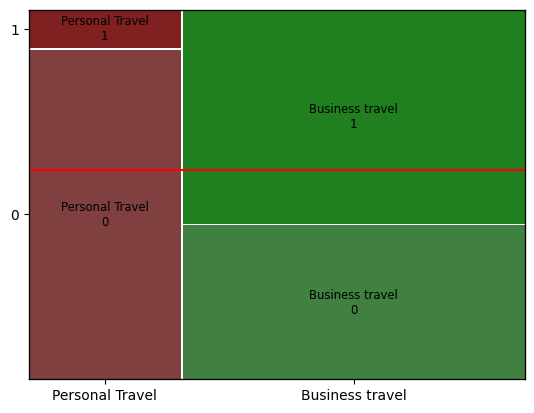

In [22]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [23]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
# print('기대빈도\n',result[3])

교차표
 Type of Travel  Business travel  Personal Travel
satisfaction                                    
0                          1446             1379
1                          2013              162
----------------------------------------------------------------------------------------------------
카이제곱통계량 984.2929106941075
p-value 4.6606654284535553e-216
자유도 1


* 파악된 내용을 기술해 봅시다.

## (3) Class --> Satisfaction

In [24]:
feature = 'Class'

* 시각화

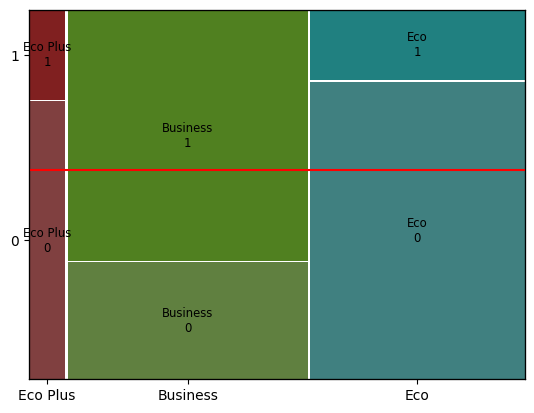

In [25]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [26]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
# print('기대빈도\n',result[3])

교차표
 Class         Business   Eco  Eco Plus
satisfaction                          
0                  777  1765       283
1                 1663   420        92
----------------------------------------------------------------------------------------------------
카이제곱통계량 1182.4142005723843
p-value 1.745897261154762e-257
자유도 2


## (4) Food and drink --> Satisfaction

In [27]:
feature = 'Food and drink'

* 시각화

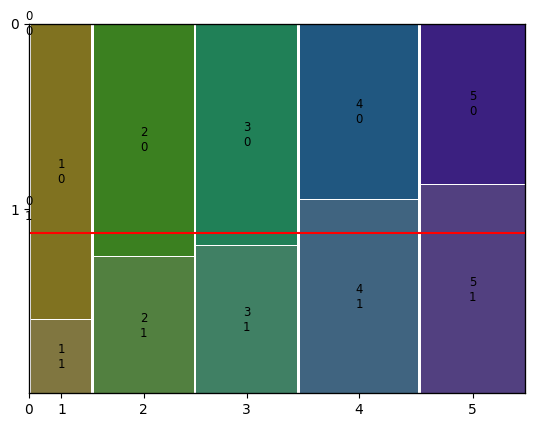

In [32]:
temp = data.sort_values(feature)
mosaic(temp, [ feature, target])
plt.axhline(temp[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [29]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
# print('기대빈도\n',result[3])

교차표
 Food and drink  0    1    2    3    4    5
satisfaction                              
0               0  497  650  628  583  467
1               4  123  380  418  643  607
----------------------------------------------------------------------------------------------------
카이제곱통계량 284.02977867350586
p-value 2.711195524646914e-59
자유도 5
